# All the imports used in the exercises 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde   # For exercise 07
import random as rd   # For exercise 08
from scipy.stats import ttest_ind   # For exercise 09

### Cleaning and Pre-processing the dataset for further use in exercises

In [2]:
# Loading the iris dataset
iris_dataset = pd.read_csv("Iris.csv")

# Displaying the shape and head of the dataset
print(iris_dataset.shape, '\n')
iris_dataset.head()

(150, 6) 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Displaying the tail of dataset
iris_dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# Checking for the missing values
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<p> -> Since, there are no missing values in the dataset, we can proceed with the exercises.</p>
<hr>


### -> Exercise 1: Calculate the mean, median, and mode of the sepal lengths in the Iris dataset.

In [5]:
# Calculating mean, median and mode of sepal lengths in the dataset
sepal_length_mean = iris_dataset['SepalLengthCm'].mean()
sepal_length_median = iris_dataset['SepalLengthCm'].median()
sepal_length_mode = iris_dataset['SepalLengthCm'].mode()[0]  # To get one value of mode 

print(f"Mean of Sepal Lengths: {sepal_length_mean:.2f}")
print("Median of Sepal Lengths:", sepal_length_median)
print("Mode of Sepal Lengths:", sepal_length_mode)

Mean of Sepal Lengths: 5.84
Median of Sepal Lengths: 5.8
Mode of Sepal Lengths: 5.0



### -> Exercise 2: Calculate the variance and standard deviation of the petal widths in the Iris dataset.

In [6]:
# Calculating variance and standard deviation of petal widths in the dataset
petal_width_variance = iris_dataset['PetalWidthCm'].var()
petal_width_std = iris_dataset['PetalWidthCm'].std()

print(f"Variance of Petal Widths: {petal_width_variance:.2f}")
print(f"Standard deviation of Petal Widths: {petal_width_std:.2f}")

Variance of Petal Widths: 0.58
Standard deviation of Petal Widths: 0.76


-> We can also calculate the standard deviation by taking square root of the variance.


### -> Exercise 3: Create a summary table that includes the mean, median, variance, and standard deviation for all numerical features in the dataset.

In [7]:
# Removing id from the dataset since it is of no use
iris_dataset.drop('Id', axis=1, inplace=True)

# Creating summary table for mean, median, mode, variance and standard deviation for all features
summary_table = iris_dataset.describe().transpose()
summary_table['variance'] = iris_dataset.drop('Species', axis=1).var()   # Since can't measure variance of species
summary_table['mode'] = iris_dataset.drop('Species', axis=1).mode().iloc[0]  # Since mode returns a series
summary_table = summary_table[['mean', '50%', 'mode', 'std', 'variance']]
summary_table.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance']
summary_table

,Mean,Median,Mode,Standard Deviation,Variance
SepalLengthCm,5.843333,5.80,5.0,0.828066,0.685694
SepalWidthCm,3.054000,3.00,3.0,0.433594,0.188004
PetalLengthCm,3.758667,4.35,1.5,1.764420,3.113179
PetalWidthCm,1.198667,1.30,0.2,0.763161,0.582414



### -> Exercise 4: Define a random variable for the sepal length and calculate the probability distribution of sepal lengths.

In [8]:
# Defining a random variable for sepal length 
sepal_length = iris_dataset['SepalLengthCm']

# Calculating probability distribution of sepal lengths
probability_distribution = sepal_length.value_counts(normalize=True).sort_index()
frequency_distribution = sepal_length.value_counts().sort_index()

# Printing frequency distribution
print('Frequency:', list(frequency_distribution))

# Checking if the sum of frequency distribution is equal to the number of rows in the dataset
print(sum(frequency_distribution) == iris_dataset.shape[0])

# Creating a distribution table for sepal lengths
distribution_table = pd.DataFrame({"Frequency":frequency_distribution, "Probability":probability_distribution})
distribution_table.head(10)

Frequency: [1, 3, 1, 4, 2, 5, 6, 10, 9, 4, 1, 6, 7, 6, 8, 7, 3, 6, 6, 4, 9, 7, 5, 2, 8, 3, 4, 1, 1, 3, 1, 1, 1, 4, 1]
True


,Frequency,Probability
SepalLengthCm,,
4.3,1,0.006667
4.4,3,0.020000
4.5,1,0.006667
4.6,4,0.026667
4.7,2,0.013333
4.8,5,0.033333
4.9,6,0.040000
5.0,10,0.066667
5.1,9,0.060000



### -> Exercise 5: Plot the probability distribution of sepal lengths using a histogram.

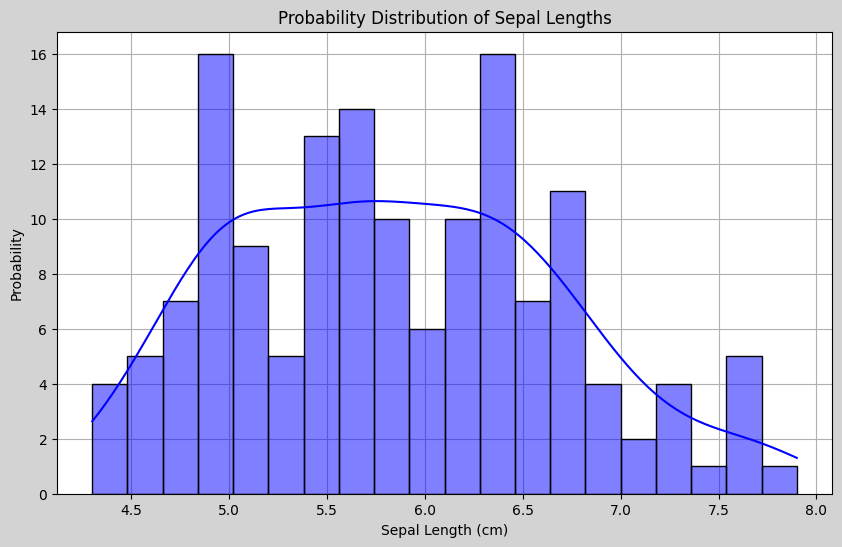

In [9]:
# Probability Distribution Histogram of Sepal lengths
plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.histplot(sepal_length, kde=True, bins = 20, color='blue', zorder=2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sepal Lengths')
plt.grid(True, zorder=1)
plt.show()


### -> Exercise 6: Calculate the cumulative distribution function (CDF) for the petal lengths and plot it.

In [10]:
# Defining a random variable for petal lengths
petal_length = iris_dataset['PetalLengthCm']

# Calculating CDF for petal lengths
probability_distribution = petal_length.value_counts(normalize=True).sort_index()
frequency_distribution = petal_length.value_counts().sort_index()
cdf = np.cumsum(probability_distribution)

# Printing frequency distribution
print('Frequency:', list(frequency_distribution))

# Checking if the sum of frequency distribution is equal to the number of rows in the dataset
print(sum(frequency_distribution) == iris_dataset.shape[0])

# Creating a distribution table for petal lengths
distribution_table = pd.DataFrame({"Frequency":frequency_distribution, "Probability":probability_distribution, "CDF":cdf})
distribution_table.head(10)

Frequency: [1, 1, 2, 7, 12, 14, 7, 4, 2, 1, 2, 2, 1, 1, 1, 3, 5, 3, 4, 2, 4, 8, 3, 5, 4, 5, 4, 8, 2, 2, 2, 3, 6, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1]
True


,Frequency,Probability,CDF
PetalLengthCm,,,
1.0,1,0.006667,0.006667
1.1,1,0.006667,0.013333
1.2,2,0.013333,0.026667
1.3,7,0.046667,0.073333
1.4,12,0.080000,0.153333
1.5,14,0.093333,0.246667
1.6,7,0.046667,0.293333
1.7,4,0.026667,0.320000
1.9,2,0.013333,0.333333


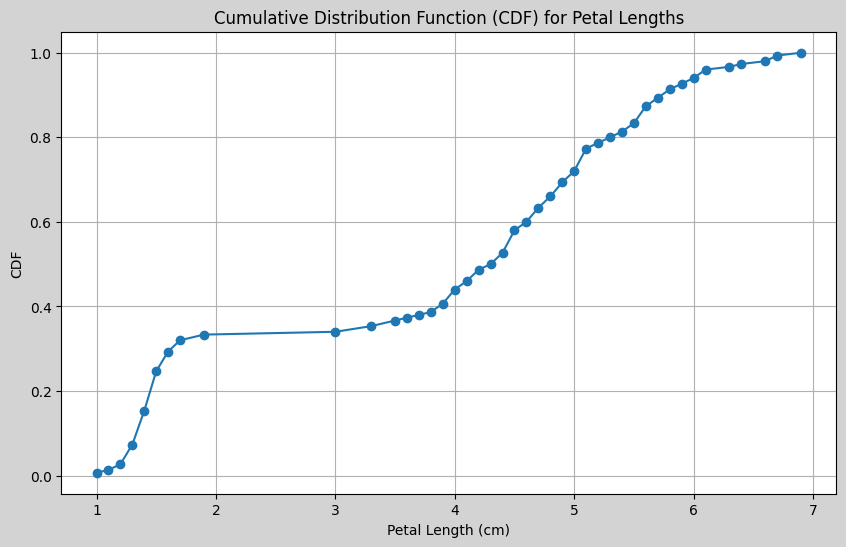

In [11]:
# Plotting the CDF
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.plot(cdf.index, cdf, marker='o', zorder=2)
plt.xlabel('Petal Length (cm)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) for Petal Lengths')
plt.grid(True, zorder=1)
plt.show()


### -> Exercise 7: Calculate and plot the probability density function (PDF) for sepal width.

In [12]:
# Defining a random variable for sepal widhts
sepal_width = iris_dataset['SepalWidthCm']

# Calculating the probability density function (PDF)
kde = gaussian_kde(sepal_width)   # Fit KDE
points = np.linspace(min(sepal_width), max(sepal_width), 100)   # Define points where you want to evaluate the KDE
pdf = kde(points)   # Evaluate KDE for these points

# Creating dataframe for pdf
df_pdf = pd.DataFrame({"PDF":pdf})
df_pdf

,PDF
0,0.053960
1,0.063431
2,0.074008
3,0.085694
4,0.098460
...,...
95,0.039642
96,0.036586
97,0.033685
98,0.030889


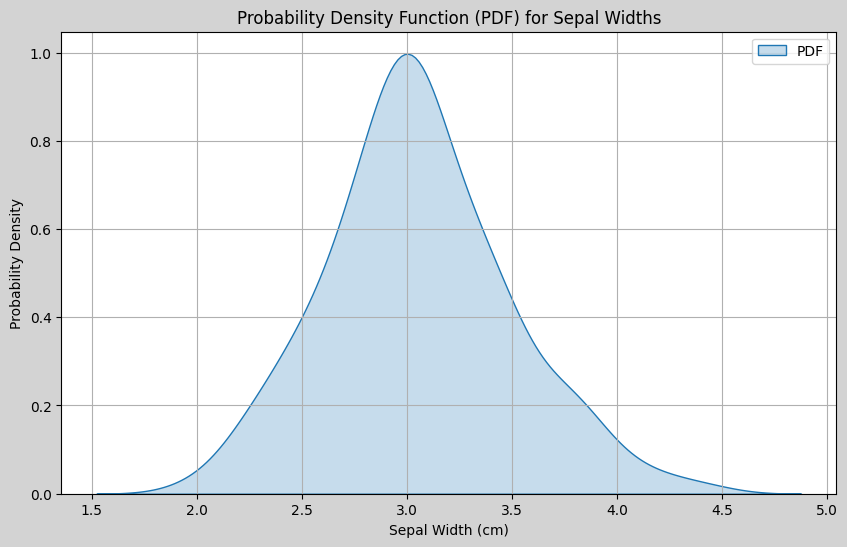

In [13]:
# Plotting the PDF
plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.kdeplot(sepal_width, fill=True, label='PDF')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) for Sepal Widths')
plt.legend()
plt.grid(True)
plt.show()

-> Here, the KDE graph shows that the 3.0 cm sepal width has the highest probability while the probability of getting below 2.0 cm or above 4.5 cm is fairly low.


### -> Exercise 8: Determine the probability of a randomly selected iris flower having a petal length greater than a given value.

In [14]:
# Finding PDF for the petal lengths
kde = gaussian_kde(petal_length)
points = np.linspace(min(petal_length), max(petal_length), 43)
pdf = kde(points)

df_pdf = pd.DataFrame({"PDF":pdf})
print(df_pdf.head(10))

# Printing the CDF table for petal lengths
print(distribution_table.head(10))


        PDF
0  0.156268
1  0.176828
2  0.191518
3  0.198578
4  0.197186
5  0.187648
6  0.171359
7  0.150535
8  0.127808
9  0.105783
               Frequency  Probability       CDF
PetalLengthCm                                  
1.0                    1     0.006667  0.006667
1.1                    1     0.006667  0.013333
1.2                    2     0.013333  0.026667
1.3                    7     0.046667  0.073333
1.4                   12     0.080000  0.153333
1.5                   14     0.093333  0.246667
1.6                    7     0.046667  0.293333
1.7                    4     0.026667  0.320000
1.9                    2     0.013333  0.333333
3.0                    1     0.006667  0.340000


In [15]:
# Randomly selecting a given value
given_value = rd.uniform(petal_length.min(), petal_length.max())

# Find the probability of a petal length greater than the given value
cdf_given_value = np.interp(given_value, points, cdf)
prob_greater_than_value = 1 - cdf_given_value

print(f"Probability of Iris flower of petal length > {given_value:.2f} cm: {prob_greater_than_value}")

Probability of Iris flower of petal length > 4.40 cm: 0.33378065588151706



### -> Exercise 9: Perform a hypothesis test to determine if there is a significant difference in the mean petal length between two species of iris flowers.

In [16]:
# Extracting petal lengths for two species: 'versicolor' and 'virginica'
versicolor_petal_length = iris_dataset[iris_dataset['Species'] == 'Iris-versicolor']['PetalLengthCm']
virginica_petal_length = iris_dataset[iris_dataset['Species'] == 'Iris-virginica']['PetalLengthCm']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(versicolor_petal_length, virginica_petal_length)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

# Interpreting the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean petal length between 'versicolor' and 'virginica'." )
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean petal length between 'versicolor' and 'virginica'.")

T-statistic: -12.60
P-value: 0.00
Reject the null hypothesis: There is a significant difference in mean petal length between 'versicolor' and 'virginica'.


<h3>T-statistic:</h3> 
<p>The t-statistic measures the difference between the sample means relative to the variability in the samples.</p>
<p>In this case, t_stat = -12.6 indicates a large negative value, suggesting that the mean petal length of 'versicolor' is significantly lower than the mean petal length of 'virginica'.</p>

<h3>P-value:</h3> 
<p>The p-value is the probability of observing the data assuming the null hypothesis is true. <br>
The p-value of 0 indicates that the probability of observing such a large difference in means by random chance, assuming no actual difference exists, is essentially zero.</p>

<h3>Significance Level:</h3> 
<p>The significance level is the threshold for determining whether the p-value is low enough to reject the null hypothesis. A common choice is 0.05, which corresponds to a 5% risk of concluding that a difference exists when there is no actual difference.</p>

<h3>Hypothesis Interpretation:</h3>
<p><b>Null Hypothesis (H₀):</b> The mean petal length of 'versicolor' is equal to the mean petal length of 'virginica'.<br>
<b>Alternative Hypothesis (H₁):</b> The mean petal length of 'versicolor' is different from the mean petal length of 'virginica'.</p>

<h3>Conclusion Based on the Results:</h3>
<p><b>Since the p-value (p_value = 0) is less than the significance level (α = 0.05):</b><br>
Reject the null hypothesis: There is strong evidence to conclude that there is a significant difference in mean petal length between 'versicolor' and 'virginica'.<br>
Specifically, the negative t-statistic (t_stat = -12.6) suggests that the mean petal length of 'versicolor' is significantly lower than that of 'virginica'. </p>
<p><b>--> So, the Alternative Hypothesis (H1) is supported for the given data.</b></p>


### -> Exercise 10: Calculate and interpret the covariance and correlation between sepal length and sepal width.

In [17]:
# Calculating the covariance between sepal length and sepal width
covariance = iris_dataset['SepalLengthCm'].cov(iris_dataset['SepalWidthCm'])
print(f"Covariance: {covariance:.2f}")

# Interpreting the covariance
if covariance > 0:
    relation = 'positive'
elif covariance < 0:
    relation = 'negative'
else:
    relation = 'no'

print(f"The sepal length and sepal width have {relation} covariance.")

Covariance: -0.04
The sepal length and sepal width have negative covariance.


<h3>Covariance:</h3>
<p><b>Covariance</b> measures the degree to which two variables change together.</p>
<p>A <b>positive covariance</b> indicates that as one variable increases, the other variable tends to increase. <br>
A <b>negative covariance</b> indicates that as one variable increases, the other variable tends to decrease.</p>

In [18]:
# Calculating the correlation between sepal length and sepal width
correlation = iris_dataset['SepalLengthCm'].corr(iris_dataset['SepalWidthCm'])
print(f"Correlation: {correlation:.2f}")

# Interpreting the correlation
if correlation > 0:
    relation = 'positive'
elif correlation < 0:
    relation = 'negative'
else:
    relation = 'no'

print(f"The sepal length and sepal width have {relation} correlation.")


Correlation: -0.11
The sepal length and sepal width have negative correlation.


<h3>Correlation:</h3>
<p>The <b>correlation coefficient</b> measures the strength and direction of the linear relationship between two variables.</p>
<p>It ranges from -1 to 1: <br>
<ul>
<li><b>1</b> indicates a perfect positive linear relationship. <br></li>
<li><b>-1</b> indicates a perfect negative linear relationship. <br></li>
<li><b>0</b> indicates no linear relationship.</p></li>
</ul>
<p>The correlation coefficient is standardized, making it easier to interpret compared to covariance.</p>